## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [9]:
import pandas as pd
%matplotlib inline

In [10]:
df = pd.read_csv('data/human_body_temperature.csv')

In [11]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


#Q1: Is the distribution of body temperatures normal?

In [12]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


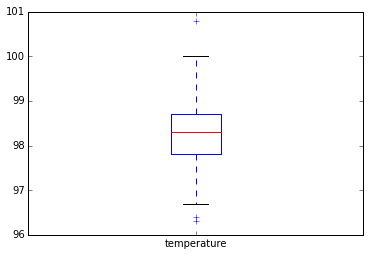

In [18]:
df.temperature.plot(kind='box')

###summaryQ1: the box-plot above shows that temperature is normally distributed, only having three outliers. The summary statistics also indicates temperature is normally distributed with mean is equivalent to meadian (both around 98.3F), and differences between quantiles are small. 

#Q2: Is the true population mean really 98.6 degrees F?
*Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

**here it is more appropriate to apply a t-test as the population standard deviation is unknown**
*here sample size(N=130) is not small, we can  use sample standard deviation as an estimate of
*population SD, then conduct the z-test. The results would be same as t-test.

In [19]:
import scipy.stats as py

In [25]:
ttest =py.ttest_1samp(df.temperature, popmean = 98.6)
print "The t-statistic is %.3f and the p-value is %.3f." % ttest

The t-statistic is -5.455 and the p-value is 0.000.


##summaryQ2: suppose true population mean is 98.6, the t-test shown the sample temperature is significant different from 98.6. At least, current sample did not support the idea that the true population mean is 98.6F. 

#Q3: At what temperature should we consider someone's temperature to be "abnormal"?
 *Start by computing the margin of error and confidence interval.

In [29]:
#first, get standard error
SE = py.tsem(df.temperature)
SE

0.064304416837891024

In [33]:
#second, 95% confidence interval for df = 129 is +-1.98
#-1.98*SE < mean - popmean < 1.98*SE
#-1.98*SE + mean< popmean < 1.98*SE + mean
mean = df.temperature.mean()
lower_limit = -1.98*SE + mean
upper_limit = 1.98*SE + mean

In [37]:
print "The normal temperature should be between %s and %s." % (lower_limit, upper_limit)

The normal temperature should be between 98.1219080239 and 98.3765535146.


#Q4: Is there a significant difference between males and females in normal temperature?
*Set up and solve for a two sample hypothesis testing.

In [38]:
temp_m = df[df.gender == 'M']
temp_f = df[df.gender == 'F']

In [44]:
two_sample = py.ttest_ind(temp_m.temperature, temp_f.temperature)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -2.285 and the p-value is 0.024.


##summaryQ4: the t-test shown males and female temperature are significantly different. 